### Import required libraries

In [8]:
import csv
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import numpy.polynomial.polynomial as poly

from numpy.polynomial import Polynomial as Poly
from scipy.optimize import curve_fit

matplotlib.rcParams['figure.figsize'] = (16, 8)

### Read in data from CSV files

In [52]:
data = {}
for i in range(0,5):
    with open('MDP Data/fan_{}/chrtusbtemp.csv'.format(i), 'rt') as file:
        values = csv.reader(file)
        next(values)  # Skip the headers
        data[i] = [val for val in values if val]

### Plot the full data series

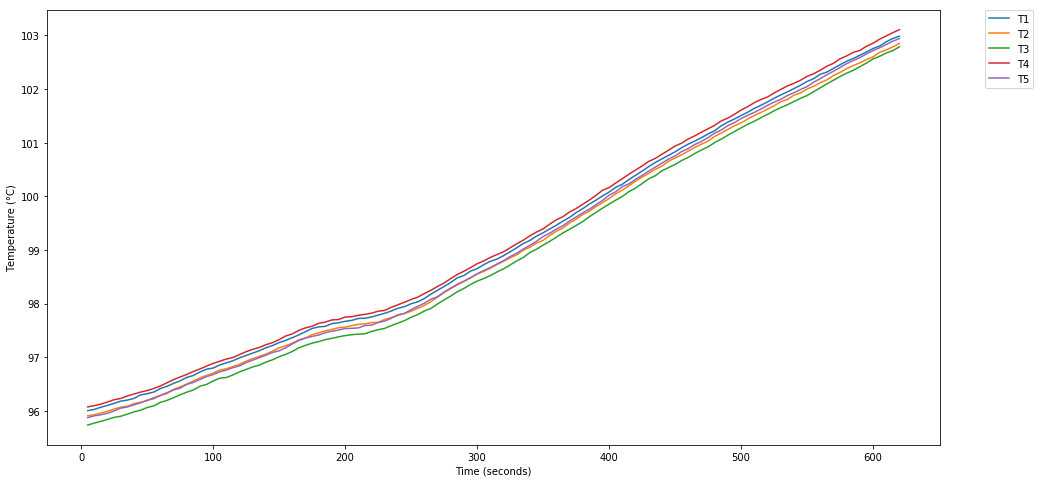

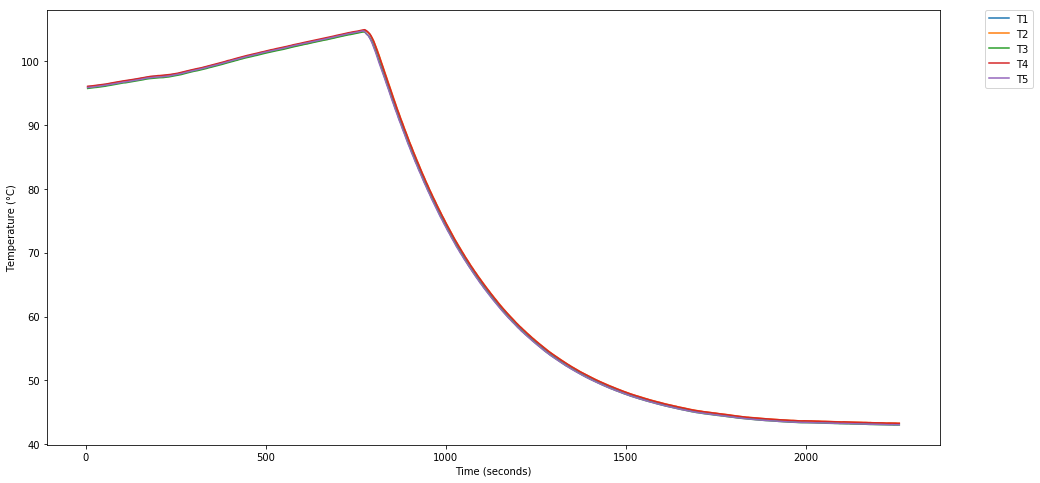

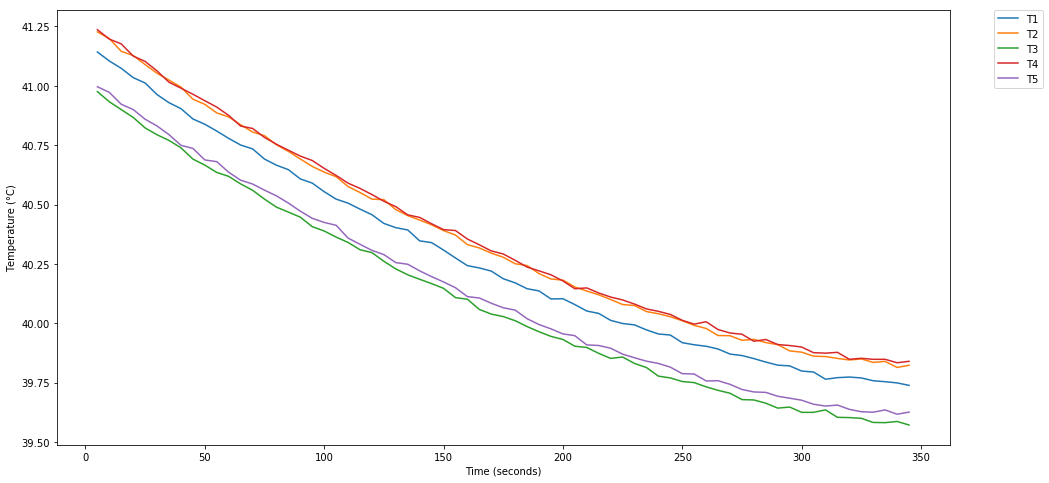

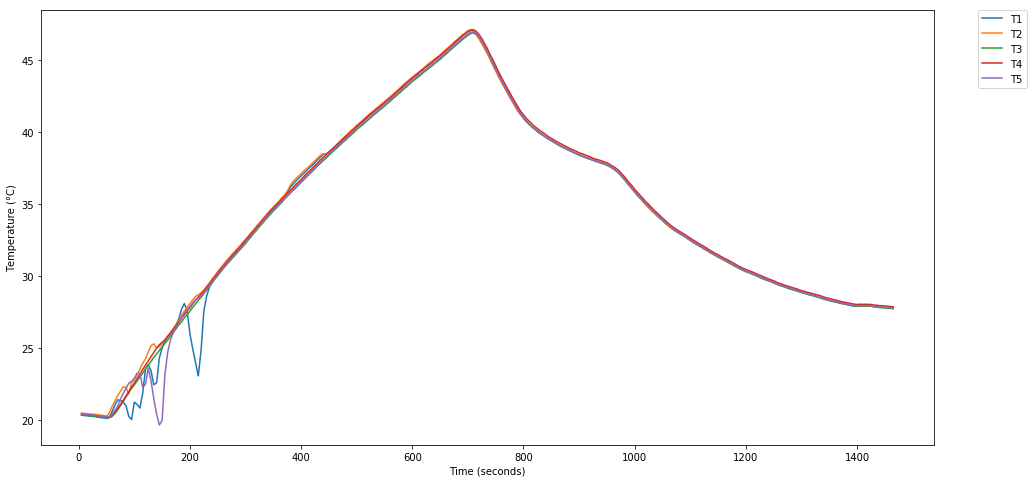

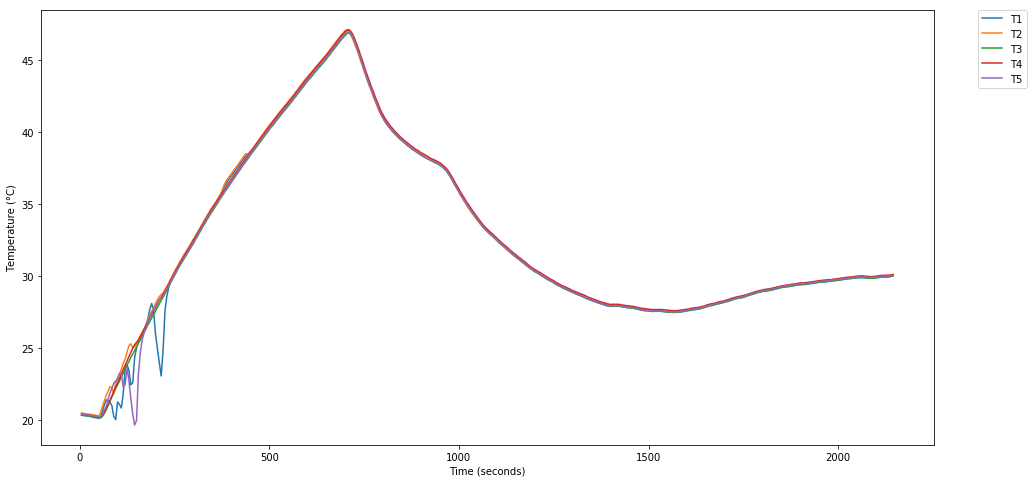

In [58]:
for m in range(0, 5):
    x = [float(row[0]) for row in data[m]]
    for i in range(1, 6):
        y = [float(row[i]) for row in data[m]]
        plt.plot(x, y, label='T{}'.format(i))
        
#     plt.axvline(x=770, alpha=0.3)
#     plt.axvline(x=2250, alpha=0.3)
   
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Temperature (°C)')
    plt.show()

### Combine the graphs for better visualisation

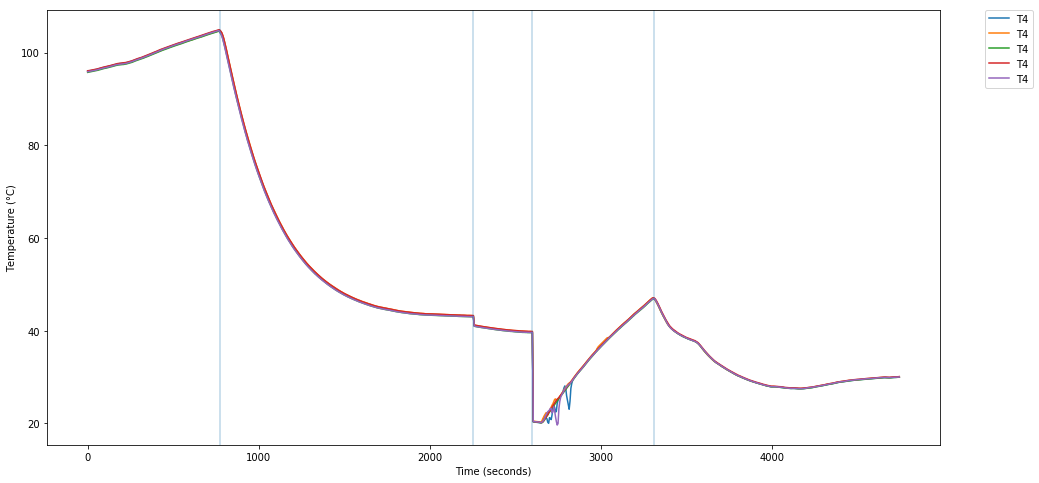

In [60]:
for m in range(1, 6):
    data = {}
    total_data = []
    to_use = [1, 2, 4]
    for i in to_use:
        with open('MDP Data/fan_{}/chrtusbtemp.csv'.format(i), 'rt') as file:
            values = csv.reader(file)
            next(values)  # Skip the headers
            data[i] = [val for val in values if val]
            total_data.extend([float(row[m]) for row in data[i]])
    time = np.arange(0, len(total_data) * 5, 5)
    plt.plot(time, total_data, label='T{}'.format(i))
    
plt.xlabel('Time (seconds)')
plt.ylabel('Temperature (°C)')

plt.axvline(x=775, alpha=0.3)
plt.axvline(x=2250, alpha=0.3)
plt.axvline(x=2600, alpha=0.3)
plt.axvline(x=3310, alpha=0.3)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
# plt.axhline(y=105, alpha=0.3)
# plt.axhline(y=71.028158742028538, alpha=0.3)
# plt.axhline(y=43.5, alpha=0.3)
# plt.axhline(y=40, alpha=0.3)
# plt.axhline(y=36.856004972327618, alpha=0.3)
# plt.axhline(y=30.513277458238953, alpha=0.3)

plt.show()

### Use curve fitting to predict steady state temperatures

In [37]:
x = [float(row[0]) for row in data[1]][154:450]
y = [float(row[1]) for row in data[1]][154:450]

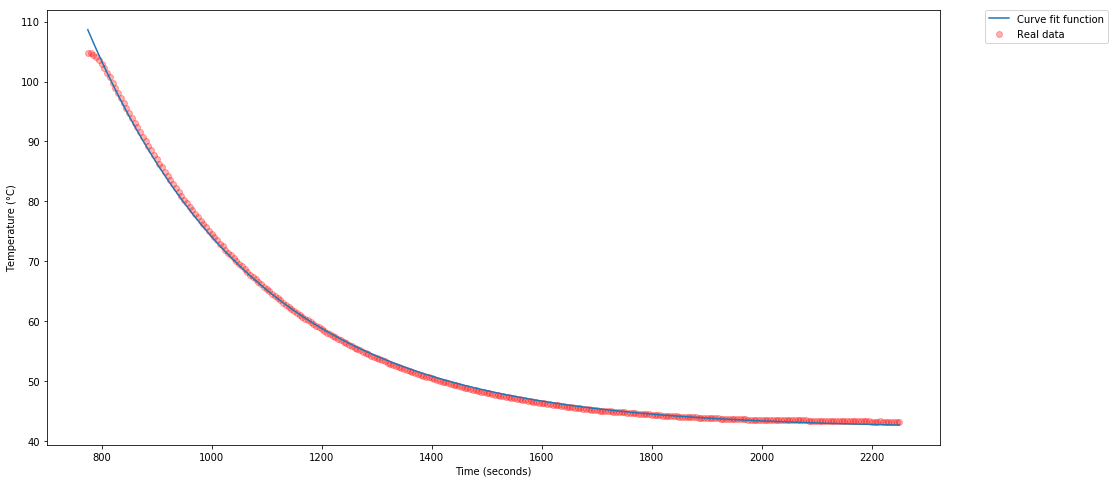

In [38]:
# Define the function to be fit to the data
def func(x, a, b, c):
    return a * np.exp(b * -x) + c

# Fit the data using scipy.optimize.curve_fit()
popt, pcov = curve_fit(func, x, y, p0=[1,0.001,50])

# Plot the data and the resulting estimated curve to confirm success
yy = [func(x, *popt) for x in x]

plt.xlabel('Time (seconds)')
plt.ylabel('Temperature (°C)')
plt.scatter(x, y, marker='o', c='r', alpha=0.3, label='Real data')
plt.plot(x, yy, label='Curve fit function')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [39]:
# Evaluate function at a very large value to get the steady state temperature
ss_temp = func(float('Inf'), *popt)
print('Steady state temperature ≈ {}°C'.format(ss_temp))

Steady state temperature ≈ 42.12216208332038°C


In [45]:
x = [float(row[0]) for row in data[2]]
y = [float(row[1]) for row in data[2]]

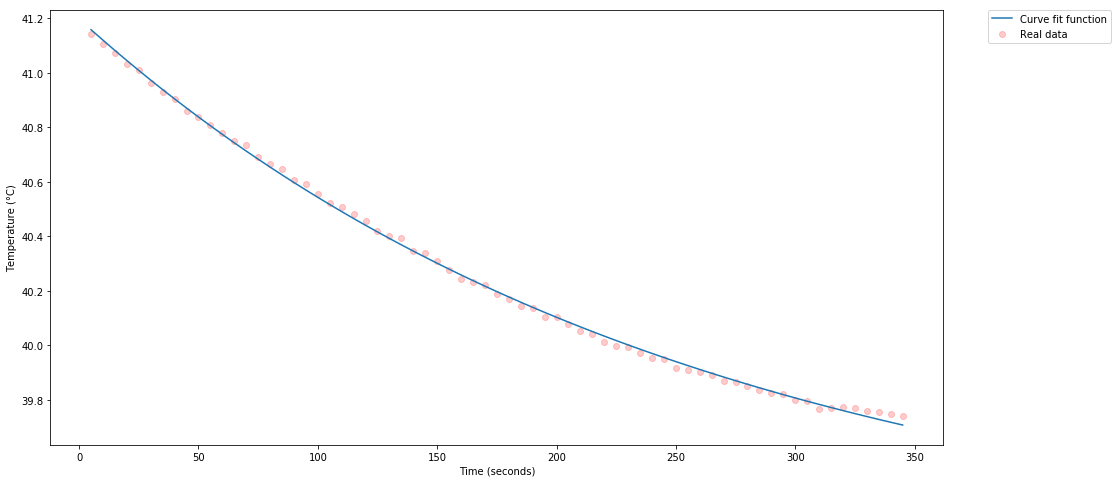

In [46]:
# Fit the data using scipy.optimize.curve_fit()
popt, pcov = curve_fit(func, x, y, p0=[1,0.001,50])

# Plot the data and the resulting estimated curve to confirm success
yy = [func(x, *popt) for x in x]

plt.xlabel('Time (seconds)')
plt.ylabel('Temperature (°C)')
plt.scatter(x, y, marker='o', c='r', alpha=0.2, label='Real data')
plt.plot(x, yy, label='Curve fit function')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [47]:
# Evaluate function at a very large value to get the steady state temperature
ss_temp = func(float('Inf'), *popt)
print('Steady state temperature ≈ {}°C'.format(ss_temp))

Steady state temperature ≈ 39.198806639645525°C


In [53]:
x = [float(row[0]) for row in data[3]][140:]
y = [float(row[1]) for row in data[3]][140:]

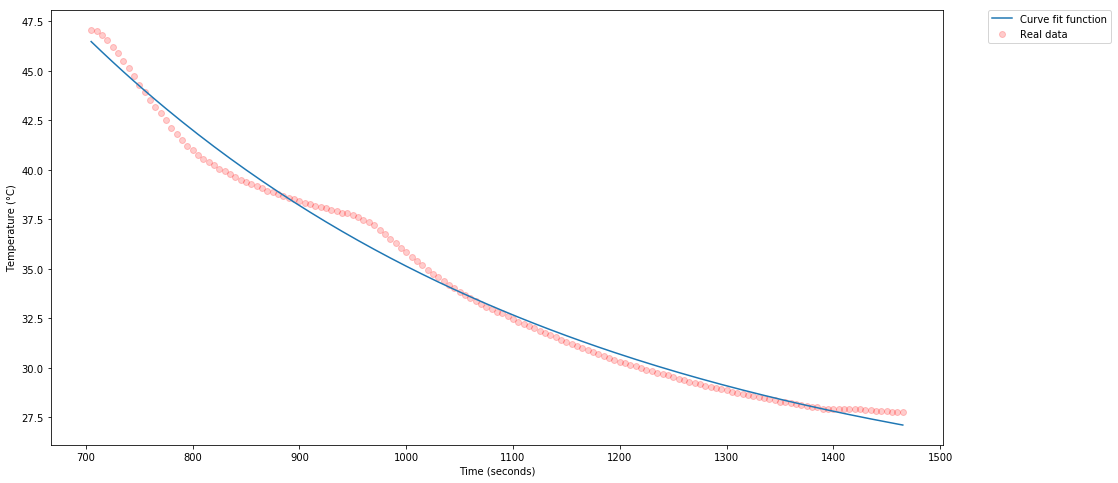

In [55]:
# Fit the data using scipy.optimize.curve_fit()
popt, pcov = curve_fit(func, x, y, p0=[0,0.01,10])

# Plot the data and the resulting estimated curve to confirm success
yy = [func(x, *popt) for x in x]

plt.xlabel('Time (seconds)')
plt.ylabel('Temperature (°C)')
plt.scatter(x, y, marker='o', c='r', alpha=0.2, label='Real data')
plt.plot(x, yy, label='Curve fit function')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [56]:
# Evaluate function at a very large value to get the steady state temperature
ss_temp = func(float('Inf'), *popt)
print('Steady state temperature ≈ {}°C'.format(ss_temp))

Steady state temperature ≈ 22.524286973568813°C


#### Results of curve fitting operations

<img src="images/heat-sink-table.png" style="width:650px;">
<br>
<caption><center> <u>**Figure 1**</u>: **Results of curve fitting**<br></center></caption>

The steady state temperature for setting 1 is obtained by simply finding the maximum temperature.

### Plot the power data from power supply

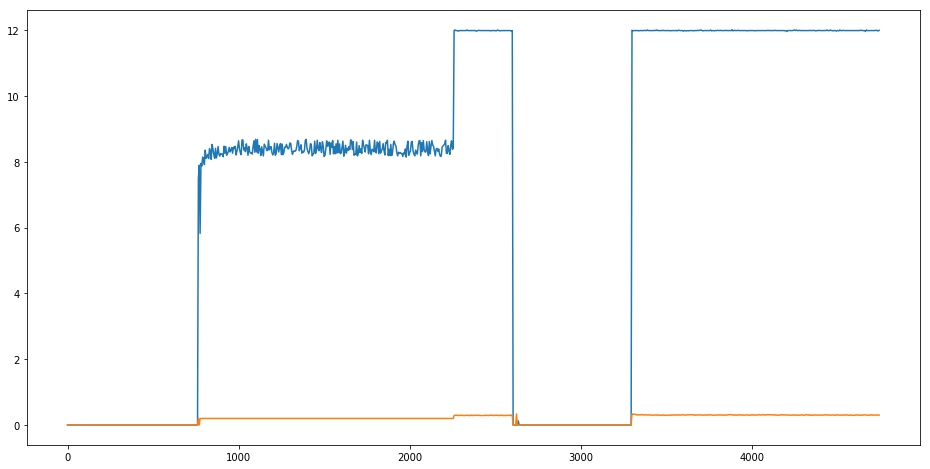

In [21]:
for m in range(3, 5):
    power_data = {}
    total_power_data = []
    to_use = [1, 2, 4]
    for i in to_use:
        with open('MDP Data/fan_{}/chrtpsu_v_i.csv'.format(i), 'rt') as file:
            values = csv.reader(file)
            next(values)  # Skip the headers
            power_data[i] = [val for val in values if val]
            total_power_data.extend([float(row[m]) for row in power_data[i]])
    time = np.arange(0, len(total_data) * 5, 5)
    plt.plot(time, total_power_data)
plt.show()

### Plot power data against temperature data

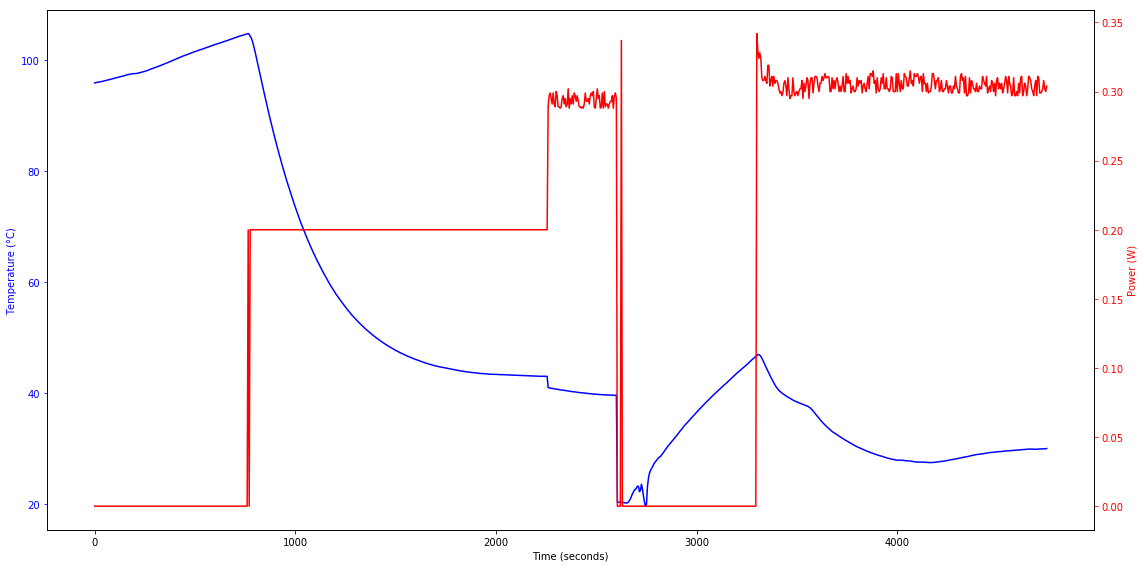

In [24]:
fig, ax1 = plt.subplots()
ax1.plot(time, total_data, 'b-')
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('Temperature (°C)', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(time, total_power_data, 'r-')
ax2.set_ylabel('Power (W)', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()